In [7]:
import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [8]:
np.random.seed(0)

In [9]:
test_matrix = np.random.normal(0,1,(20, 20))

In [10]:
def frobenius_norm(A):
    return np.sqrt(np.trace(np.matmul(np.transpose(A),A)))

In [11]:
frobenius_norm(test_matrix)

19.770970813210337

In [12]:
np.linalg.norm(test_matrix, 'fro')

19.77097081321034

In [13]:
ts = []
ns = [1000*i for i in list(range(1,10))]
for n in ns:
    f = lambda: frobenius_norm(np.random.normal(0,1,(n, n)))
    ts.append(timeit(f, number=1))

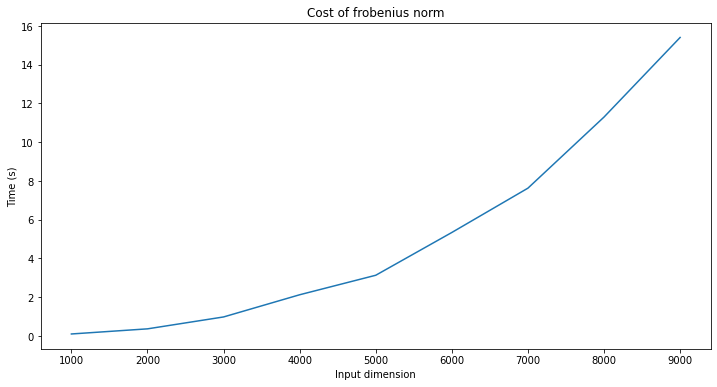

In [14]:
plt.figure(figsize=(12,6))
plt.xlabel('Input dimension')
plt.ylabel('Time (s)')
plt.title('Cost of frobenius norm')
plt.plot(ns, ts)

In [15]:
ts = []
ns = [1000*i for i in list(range(1,10))]
for n in ns:
    f = lambda: np.linalg.norm(np.random.normal(0,1,(n, n)), 'fro')
    ts.append(timeit(f, number=1))

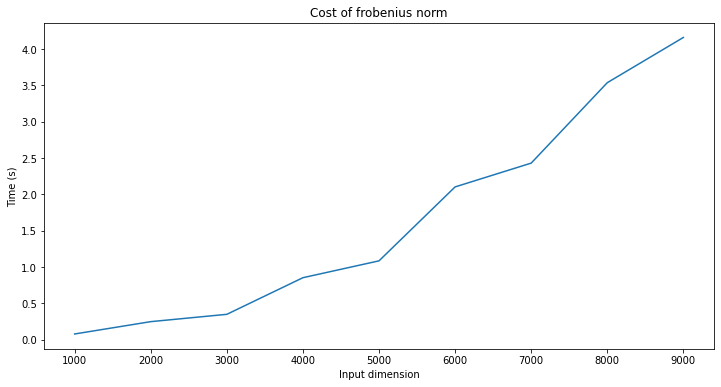

In [16]:
plt.figure(figsize=(12,6))
plt.xlabel('Input dimension')
plt.ylabel('Time (s)')
plt.title('Cost of frobenius norm')
plt.plot(ns, ts)

In [18]:
# here is an infinity norm function I found on Stack Exchange. Why is it wrong?
def infinity_norm_wrong(A):
    return max(abs(row.sum()) for row in A)

def infinity_norm_right(A):
    return max(abs(row).sum() for row in A)

In [19]:
print(infinity_norm_wrong(test_matrix))
print(infinity_norm_right(test_matrix))

11.386691858912695
22.40596879210187


In [20]:
np.linalg.norm(test_matrix, np.inf)

22.40596879210187

In [13]:
# this is a correct infinity norm function.
def infinity_norm(A):
    return max(abs(row).sum() for row in A)

In [14]:
infinity_norm(test_matrix)

22.52778128569587

In [15]:
np.linalg.norm(test_matrix, np.inf)

22.52778128569587

In [21]:
ts = []
ns = [1000*i for i in list(range(1,10))]
for n in ns:
    f = lambda: np.linalg.norm(np.random.normal(0,1,(n, n)), np.inf)
    ts.append(timeit(f, number=1))

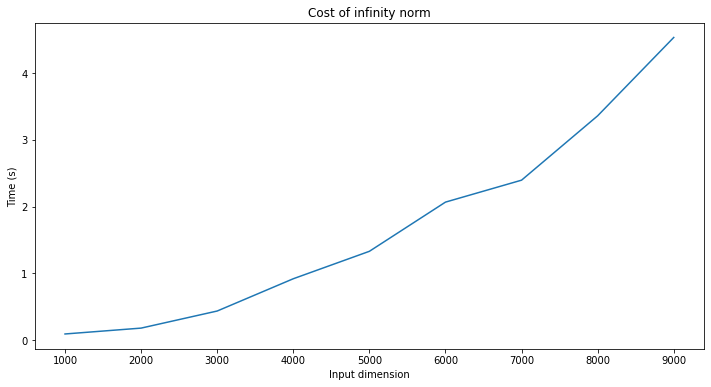

In [22]:
plt.figure(figsize=(12,6))
plt.xlabel('Input dimension')
plt.ylabel('Time (s)')
plt.title('Cost of infinity norm')
plt.plot(ns, ts)